
 # <center>**HUMAN RESOURCES**
 # <center>*Employee Atrittion*


In this case study, we will assume that you have been hired as a data scientist and you have been tasked to improve the human resources department. 

Using data science, hiring and retaining top talent is an extremely challenging task that requires capital, time, and skills. Small business owners spend 40% of their working hours on tasks that do not generate any income, such as hiring, for example. Companies spend 15% to 20% of the employees' salary to recruit a new candidate, which is a massive amount, especially for large corporations with thousands of employees.

So in this case study, the HR team collected extensive data on their employees and approached you to develop a model that could predict which employees are more likely to quit the team. They provided you with extensive data such as job involvement, education level, job satisfaction, performance rating, relationship satisfaction, and work-life balance.

By developing accurate prediction models that could predict employee retention, you could potentially save the company hundreds of thousands of dollars.

<center> <img src="employee_retention_prediction.png"> </center>

**Learning Outcomes:**

First, understand how to leverage the power of data science to reduce employee turnover and transform the human resources department.

Second, understand the theory behind logistic regression and random forest classifiers. Train a logistic regression classifier and random forest classifier. Models using scikit-learn. Apply sigmoid functions to obtain probability load and manipulate the dataset using pandas DataFrame.

Develop a function in Python and apply it to a Pandas DataFrame. Perform exploratory data analysis using Matplotlib and seaborn libraries, plot kernel density estimate plots or KDE for short, box plots, and count plots.

Convert categorical variables into dummy variables, divide datasets into training and testing data using scikit-learn. Learn to understand the theory and intuition behind artificial neural networks and how to apply them to perform classification tasks.

Evaluate classification models and present results using confusion matrix and classification reports and understand the difference between precision, recall, and F1 score.

And that's it! I hope you will enjoy this case study and let's get started.

*Data Source:* [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)



## 1. Problem Statement and Business Case

Hiring costs are steep. Between employee wage and payroll taxes on one side and recruiting costs on the other, even small businesses can end up spending five figures per new employee. Ultra-low unemployment rates, coupled with an aging workforce and greater affinity for independent work, have been also driving the hiring costs up year-on-year. 

> ### <center> The average cost per hire was $4,129 in 2019 but rose to <br> $4,700 in 2023, which is a 14% increase. </center>
> <center> — The Society for Human Resource Management</center>

In reality, however, the cost of hiring an employee can be much higher for certain positions currently experiencing high talent shortages — think cybersecurity, engineering, or data science!. Likewise, the average cost per hire for an executive position is $28,329!

**Keypoints:**


* Hiring and retaining employees are extremely complex tasks that require capital, time and skills
* Small business owners spend 40% of their working hours on tasks that do not generate any income such as hiring
* Companies spend 15-20% of the employee's salary to recruit a new candidate
* An average company loses anywhere between 1% and 2.5% of their total revenue on the time it takes to bring a new hire up to speed
* Hiring a new employee costs an average of US$7645 (0-500 corporation)
* It takes 52 days on average to fill a position

*Source*: [The True Cost of Hiring an Employee in 2024](https://toggl.com/blog/cost-of-hiring-an-employee)

## 2. Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', None)

In [2]:
# You have to include the full link to the csv file containing your dataset
data = pd.read_csv('Human_Resources.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## 3. Exploratory Data Analysis (EDA)

In [3]:
print(f'{data.shape[1]} features in total, each contains {data.shape[0]} data points')

35 features in total, each contains 1470 data points


In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Let's replace 'Attritition' , 'overtime' , 'Over18' column with integers before performing any visualizations
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Over18'] = data['Over18'].apply(lambda x: 1 if x == 'Y' else 0)
data['OverTime'] = data['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [7]:
# Let's see if we have any missing data, luckily we don't!
if data.isnull().sum().sum() == 0:
    print('CHECK: No missing data \n')
else:
    print('CHECK: Missing data found \n')
print(data.isnull().sum())

CHECK: No missing data 

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentR

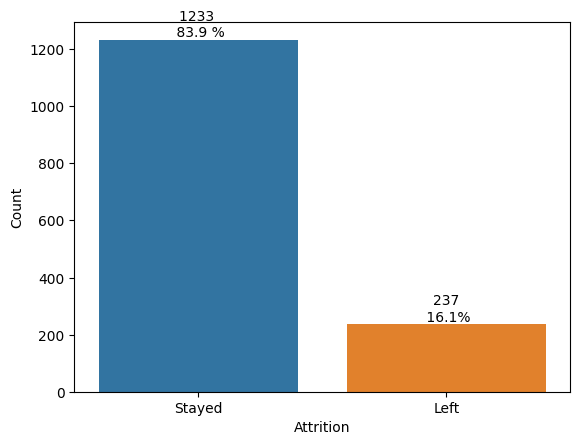

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Attrition', data=data)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks([0,1], ['Stayed', 'Left'])
plt.annotate(f'{data["Attrition"].value_counts()[0]} \n {round(data["Attrition"].value_counts()[0]/len(data)*100,1)} %', (0, data["Attrition"].value_counts()[0]), ha='center', va='bottom')
plt.annotate(f'{data["Attrition"].value_counts()[1]}\n {round(data["Attrition"].value_counts()[1]/len(data)*100,1)}%', (1, data["Attrition"].value_counts()[1]), ha='center', va='bottom')

plt.show()
plt.show()



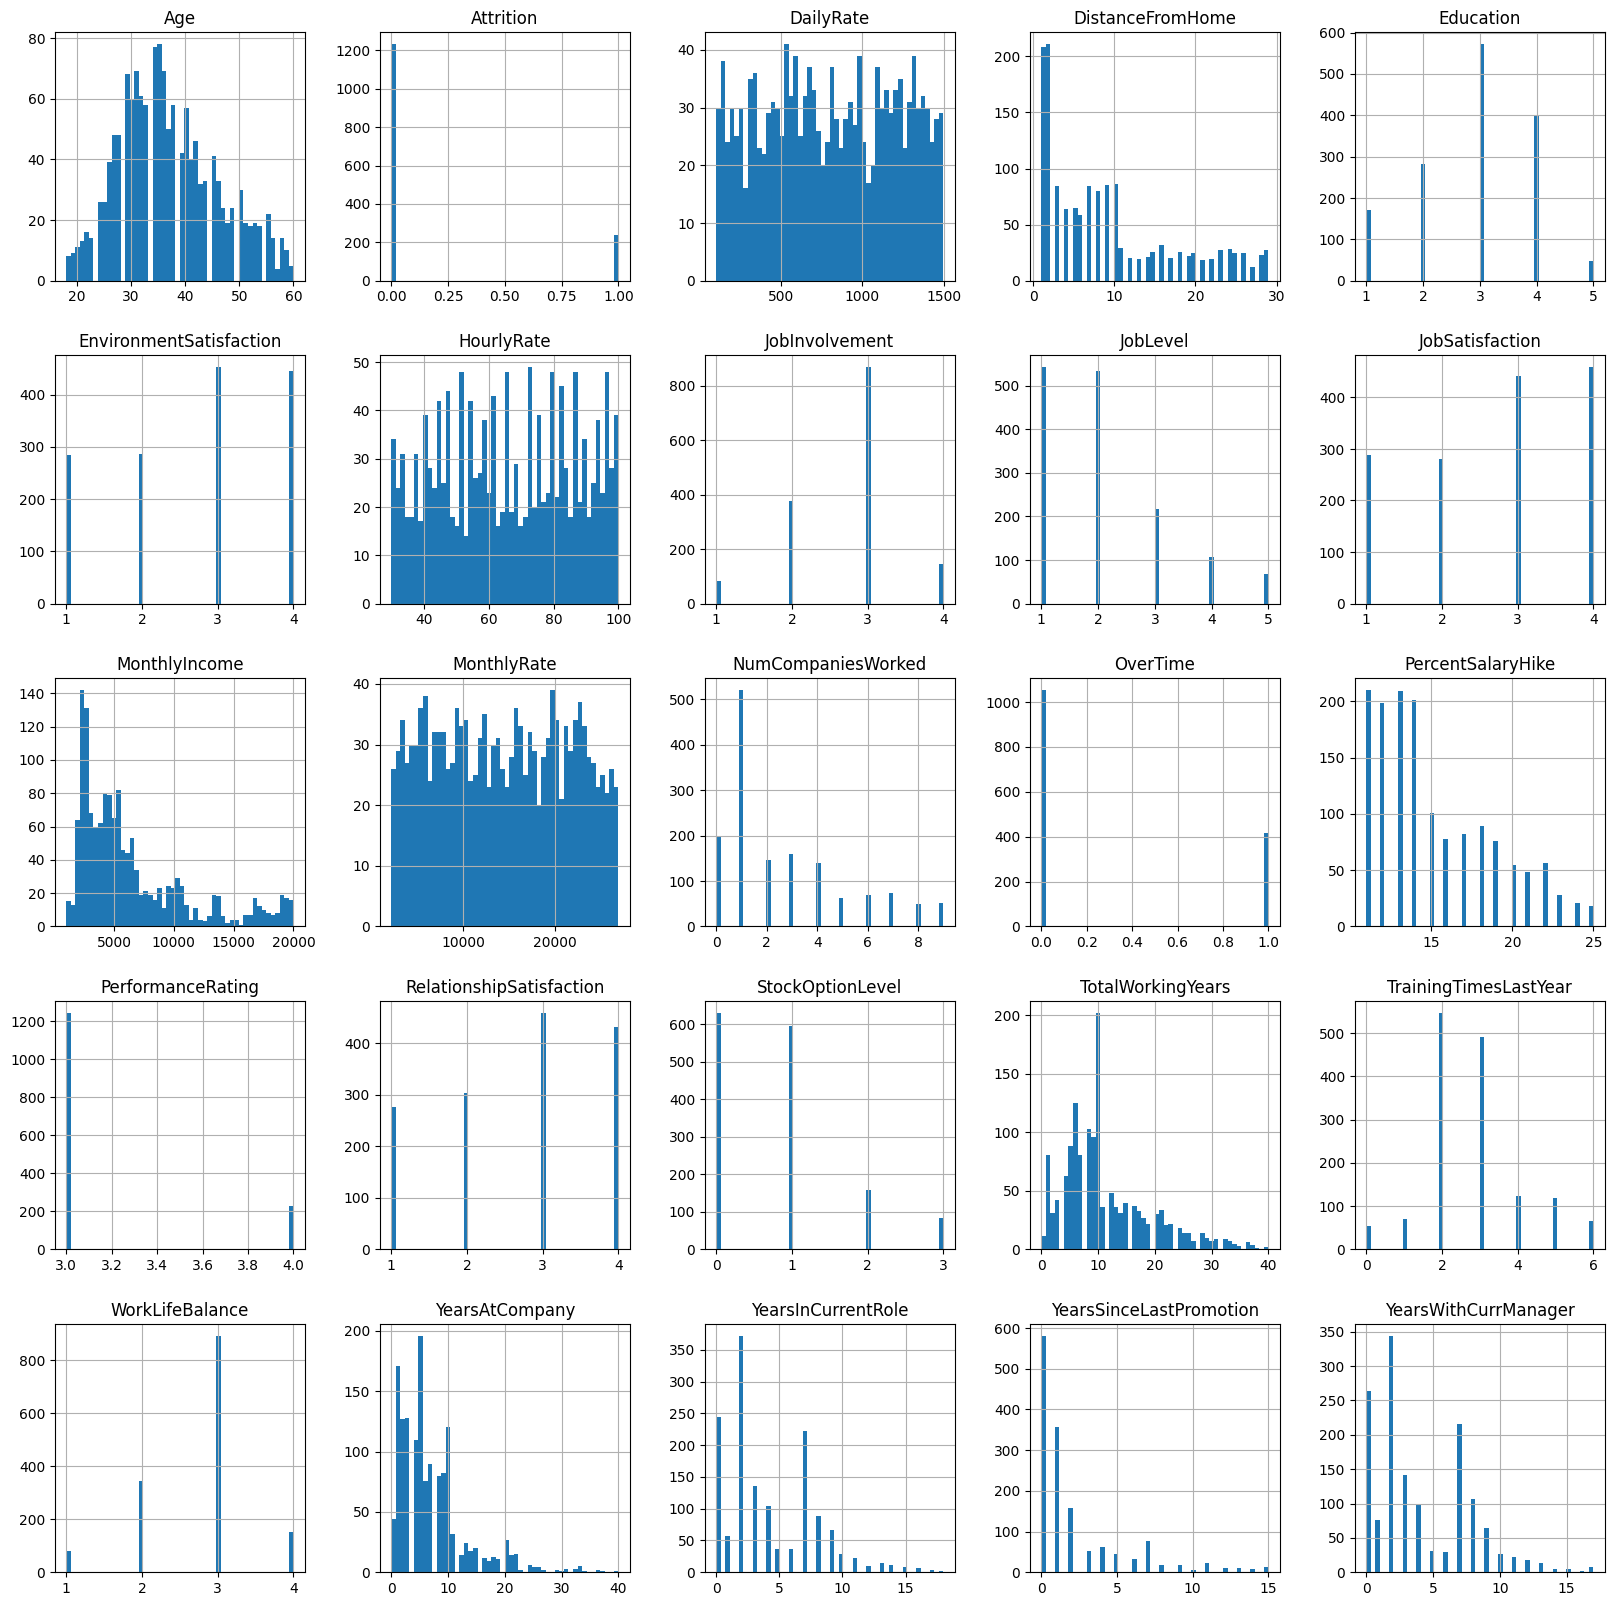

In [51]:
#plot histogram for each numeric variable/feature of the dataset
data.hist(figsize=(20,20), bins=50)
plt.show()
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other

In [10]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
data.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis="columns", inplace=True)


In [11]:
# Let's see how many employees left the company!
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset
left_df = data[data['Attrition'] == 1]
stayed_df = data[data['Attrition'] == 0]
print(f'Total Employees: {len(data)}\n')
print(f'Number of employees who left: {data["Attrition"].value_counts()[1]}')
print(f'% of employees who left: {round(data["Attrition"].value_counts()[1]/len(data)*100,2)}%\n')
print(f'Number of employees who stayed: {data["Attrition"].value_counts()[0]}')
print(f'% of employees who stayed: {round(data["Attrition"].value_counts()[0]/len(data)*100,2)}%')


Total Employees: 1470

Number of employees who left: 237
% of employees who left: 16.12%

Number of employees who stayed: 1233
% of employees who stayed: 83.88%


In [12]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset
left_df = data[data['Attrition'] == 1]
stayed_df = data[data['Attrition'] == 0]

In [13]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [14]:
left_df.describe()

#  Let's compare the mean and std of the employees who stayed and left
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


<Axes: xlabel='DistanceFromHome', ylabel='Count'>

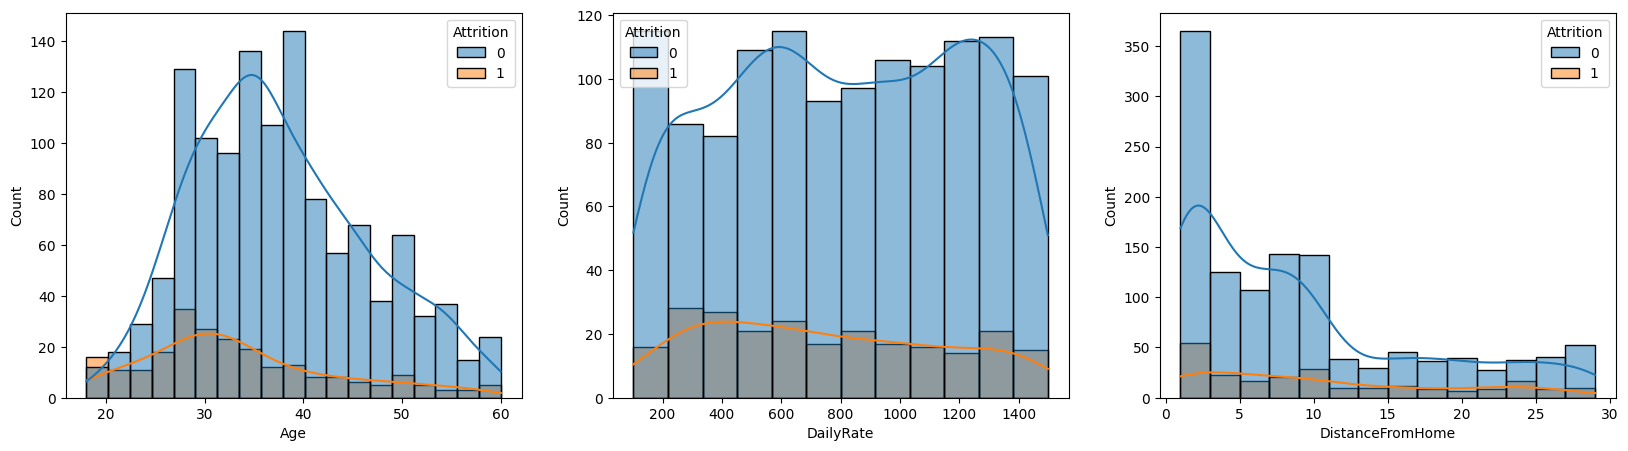

In [15]:
#plot histogram of numeric data with Attrition 1 or 0
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(data, x='Age', hue='Attrition', kde=True, ax=ax[0])
sns.histplot(data, x='DailyRate', hue='Attrition', kde=True, ax=ax[1])
sns.histplot(data, x='DistanceFromHome', hue='Attrition', kde=True, ax=ax[2])


* Job level is strongly correlated with total working hours
* Monthly income is strongly correlated with Job level
* Monthly income is strongly correlated with total working hours
* Age is stongly correlated with monthly income

<Axes: >

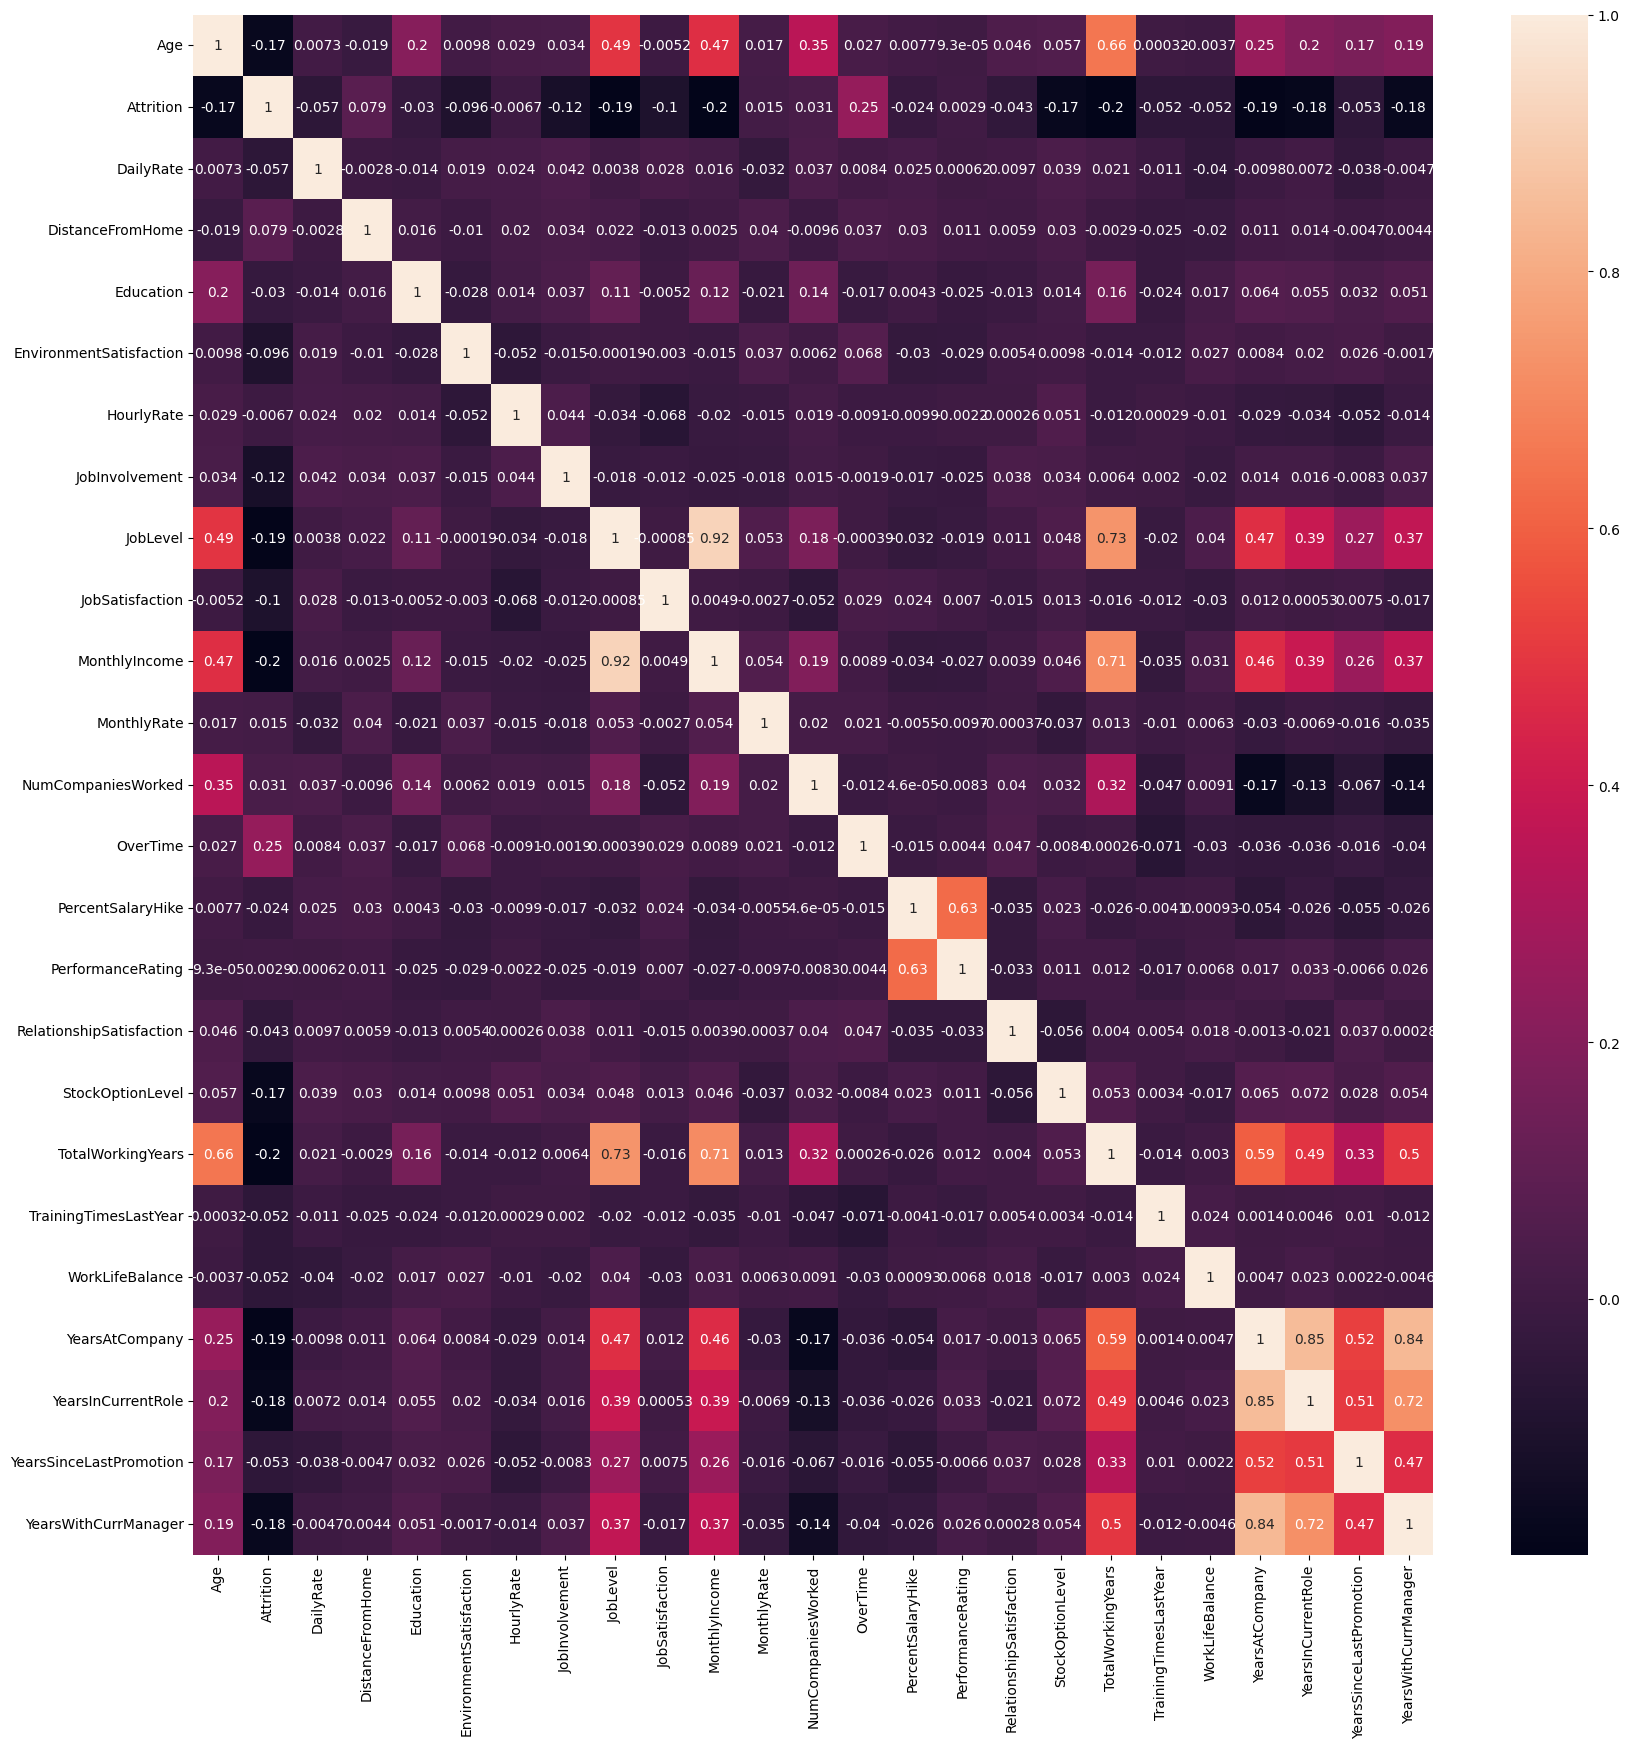

In [16]:
correlations = data.corr(numeric_only=True, method='spearman') #We're using Spearman's Correlation Coefficient as we are dealing with non-parametric data (not normally distributed)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True)
# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income



<Axes: xlabel='Age', ylabel='count'>

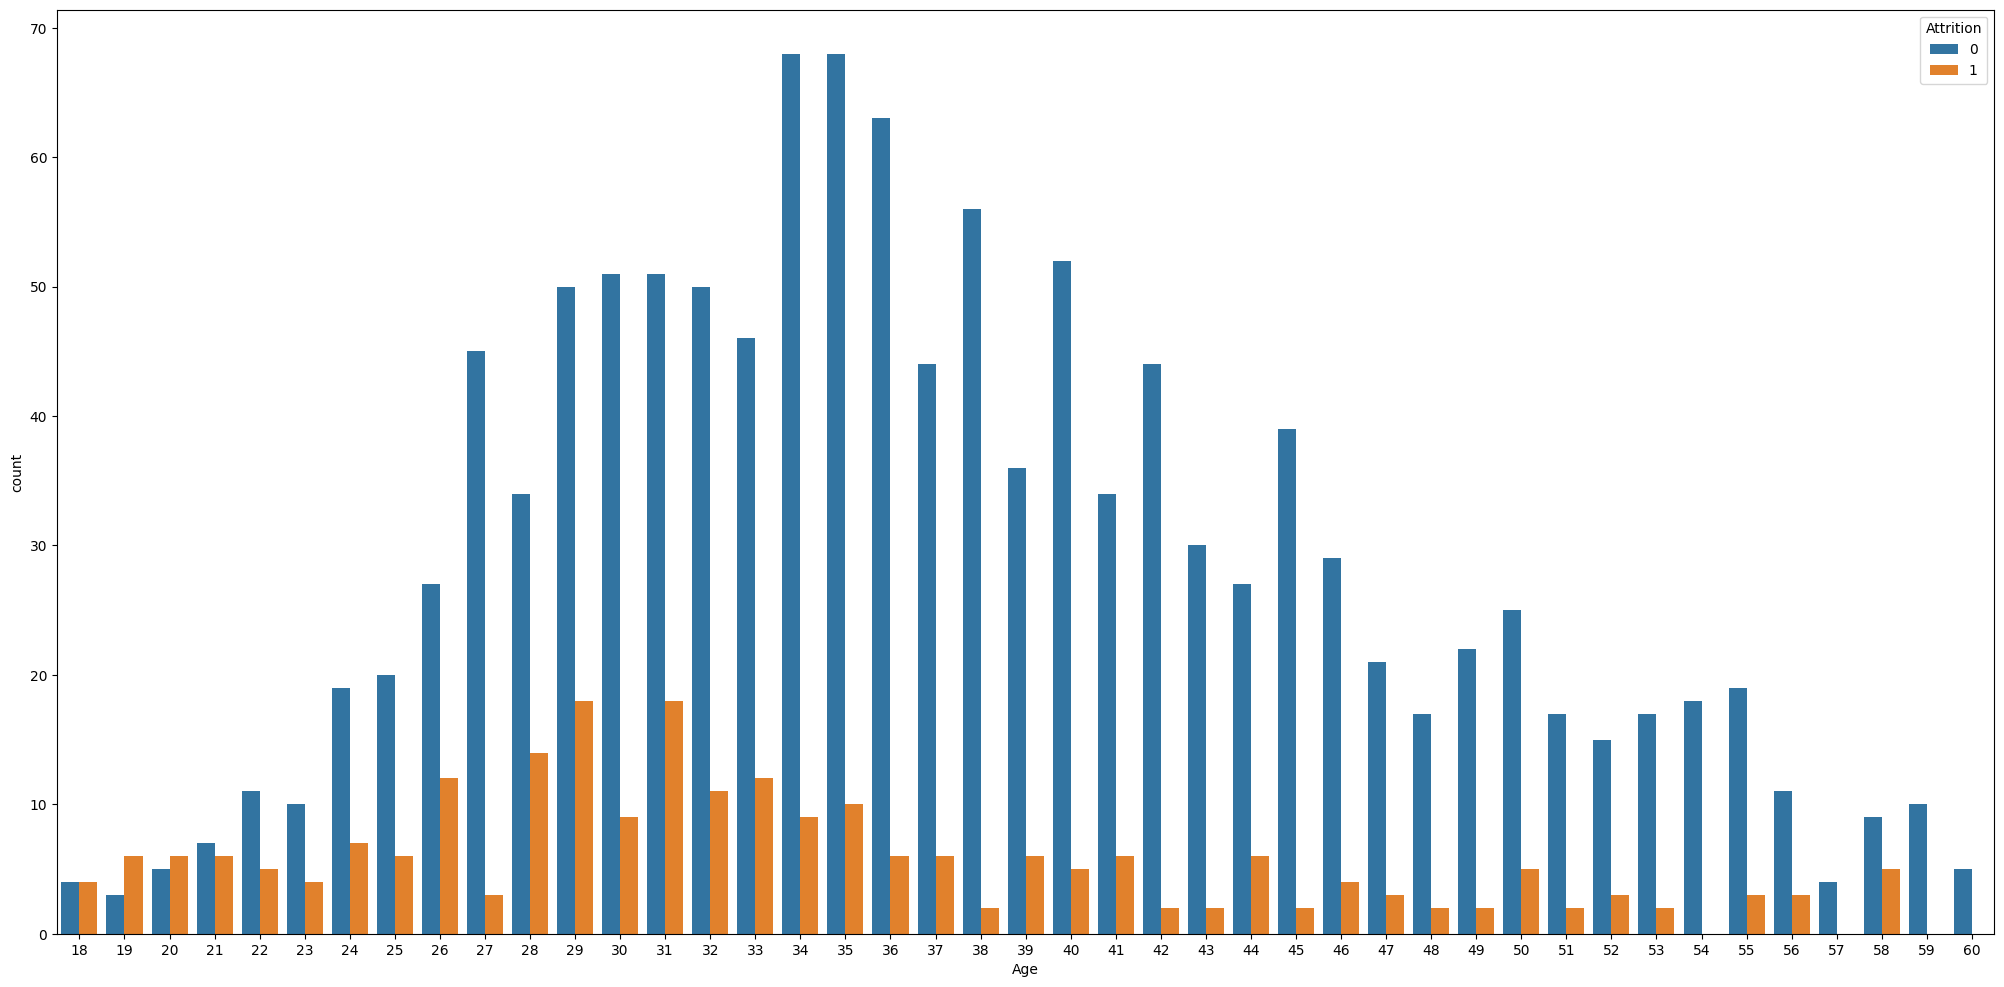

In [17]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = data)

<Axes: xlabel='JobLevel', ylabel='count'>

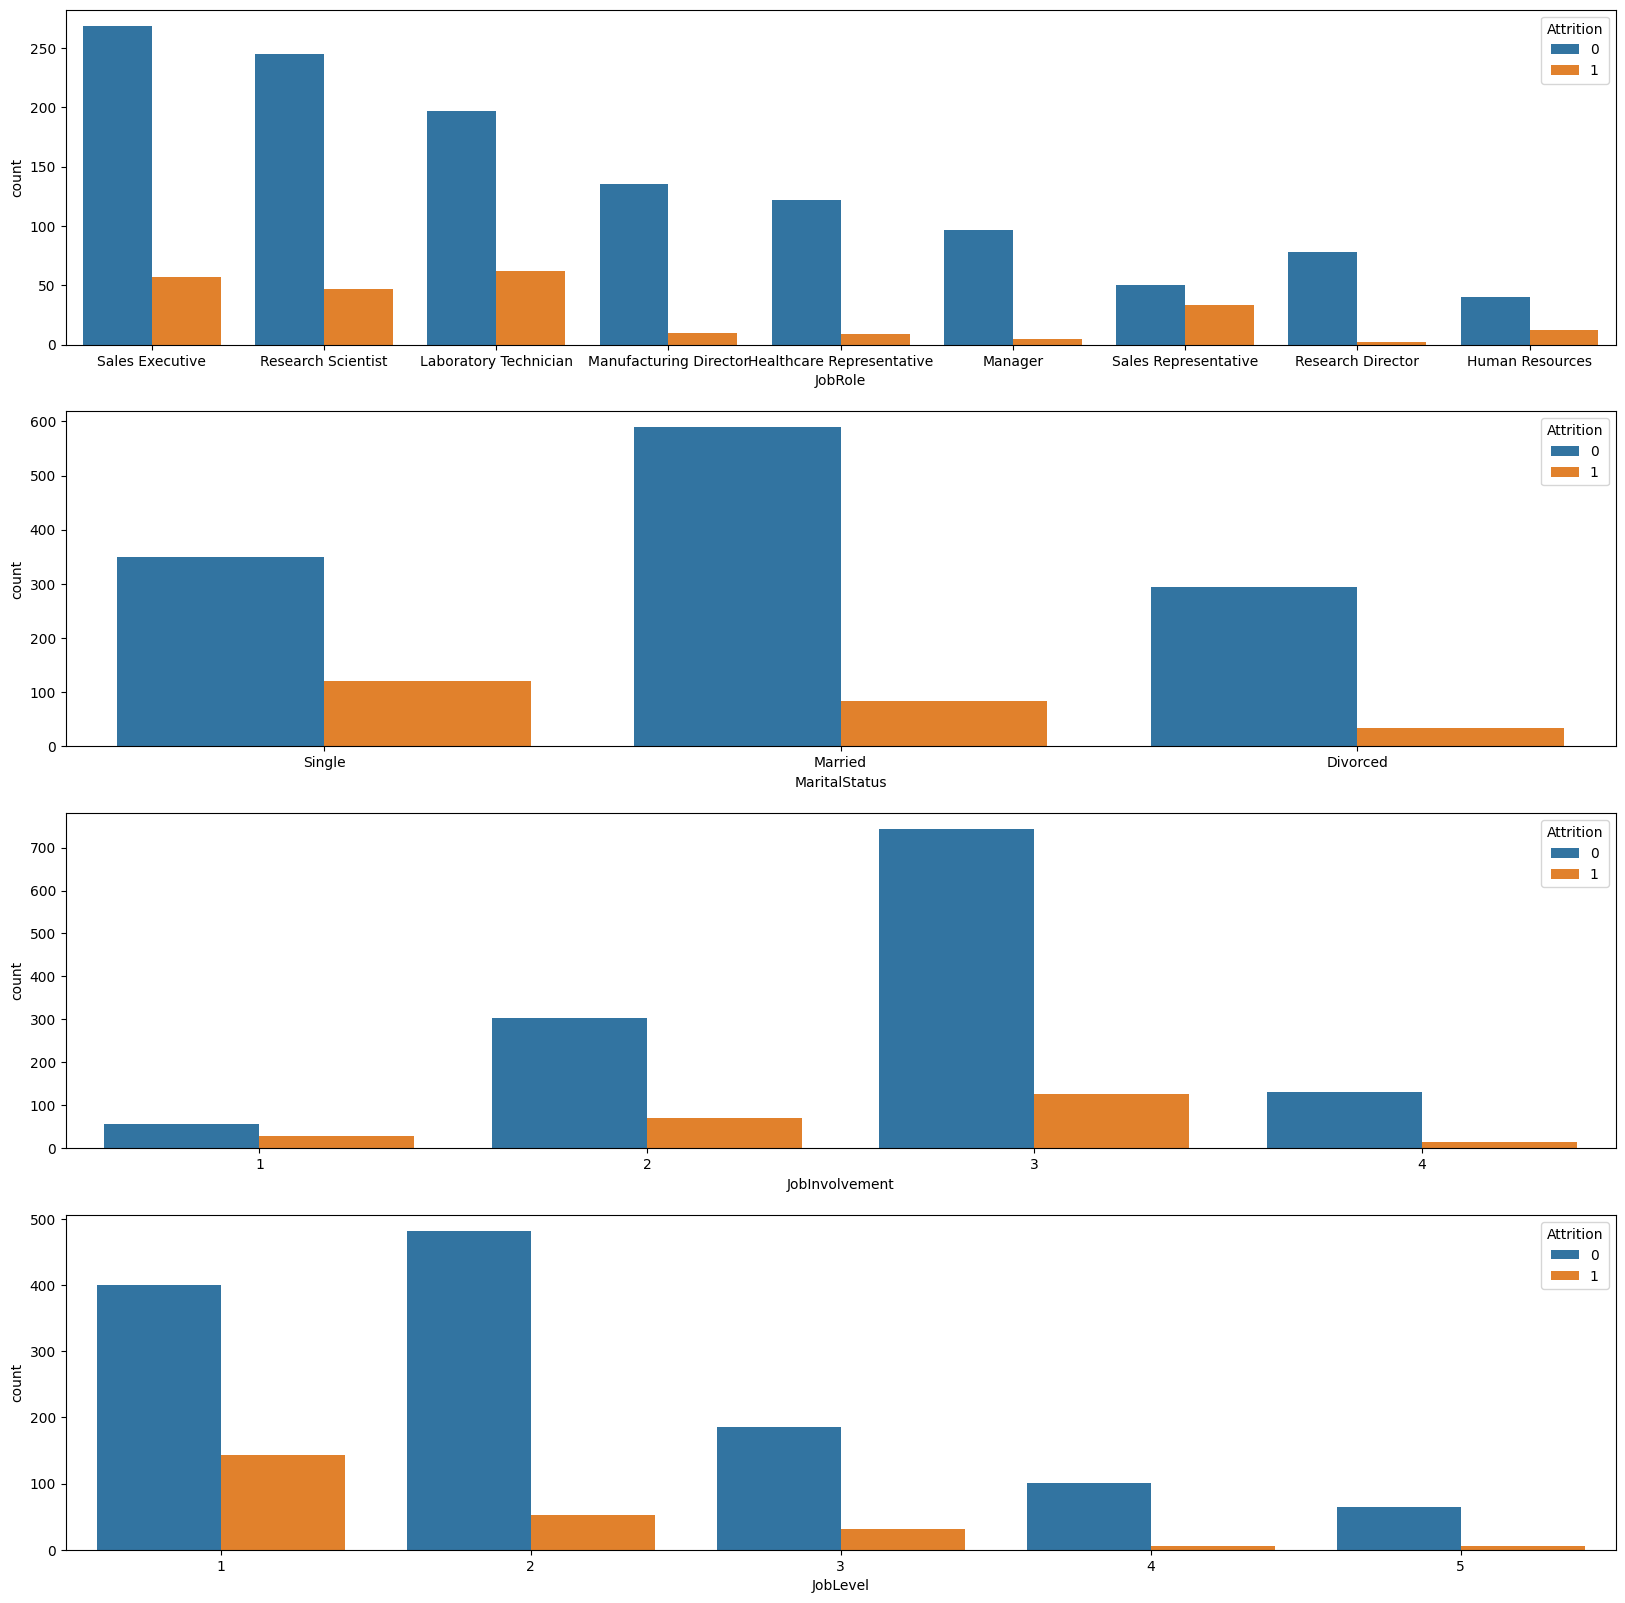

In [18]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = data)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = data)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = data)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = data)

# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job
# Less involved employees tend to leave the company
# Less experienced (low job level) tend to leave the company

* There is significant difference in the distance from home between employees who left and stayed (p<.05)

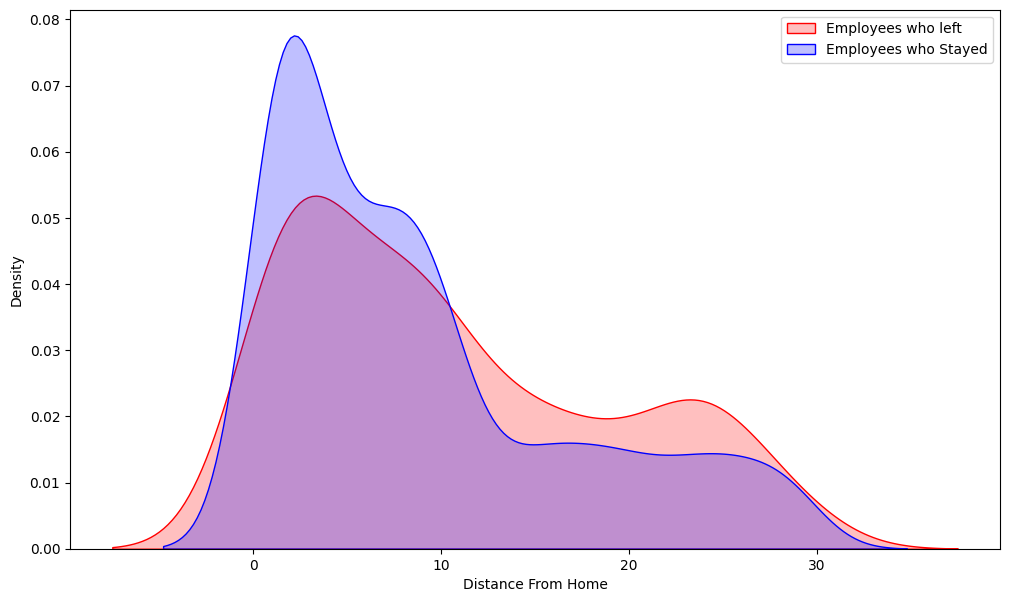

In [19]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['DistanceFromHome'], label='Employees who left', fill=True, color='r')
sns.kdeplot(stayed_df['DistanceFromHome'], label='Employees who Stayed', fill=True, color='b')
plt.xlabel('Distance From Home')
plt.legend()

In [20]:
#Mann-Whitney's test to check if there is a significant difference between the two groups
from scipy.stats import mannwhitneyu
stats, p = mannwhitneyu(left_df["DistanceFromHome"], stayed_df["DistanceFromHome"])
print(f'p-value: {p}')
# p-value is 0.0023870470273627984 which is less than 0.05, so we reject the null hypothesis
# There is significant difference in the distance from home between employees who left and stayed

p-value: 0.0023870470273627984


* There is significant difference in the Years With Current Manager between employees who left and stayed (p<.05)

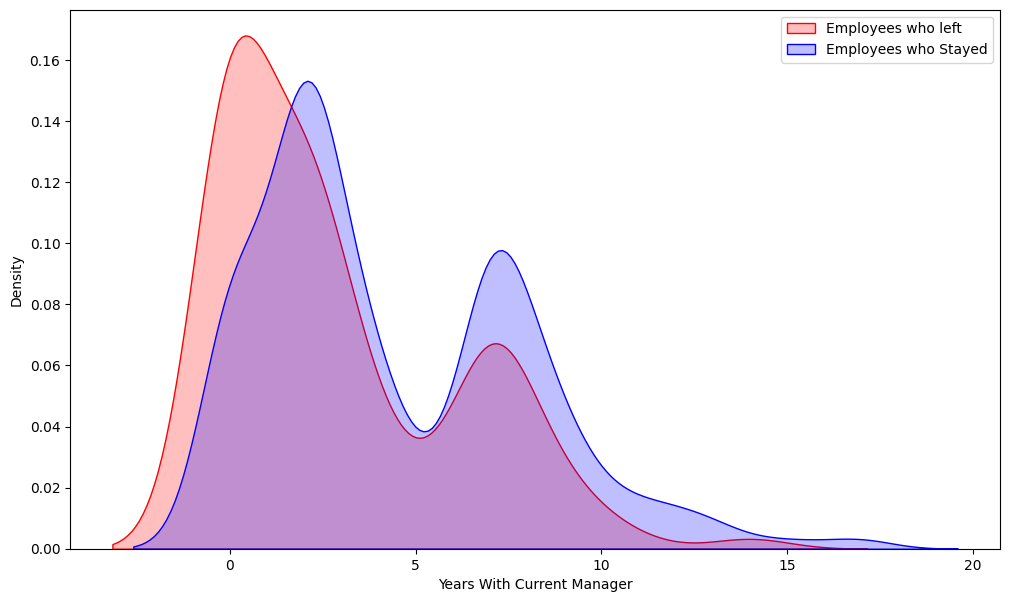

In [21]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['YearsWithCurrManager'], label='Employees who left', fill=True, color='r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label='Employees who Stayed', fill=True, color='b')
plt.xlabel('Years With Current Manager')
plt.legend()

In [22]:
#Mann-Whitney's test to check if there is a significant difference between the two groups
from scipy.stats import mannwhitneyu
stats, p = mannwhitneyu(left_df["YearsWithCurrManager"], stayed_df["YearsWithCurrManager"])
print(f'p-value: {p}')
# p-value is 1.8067542583144407e-11 which is less than 0.05, so we reject the null hypothesis
# There is significant difference in the years with current manager between employees who left and stayed

p-value: 1.8067542583144407e-11


* There is significant difference in the Total Working Years between employees who left and stayed (p<.05)

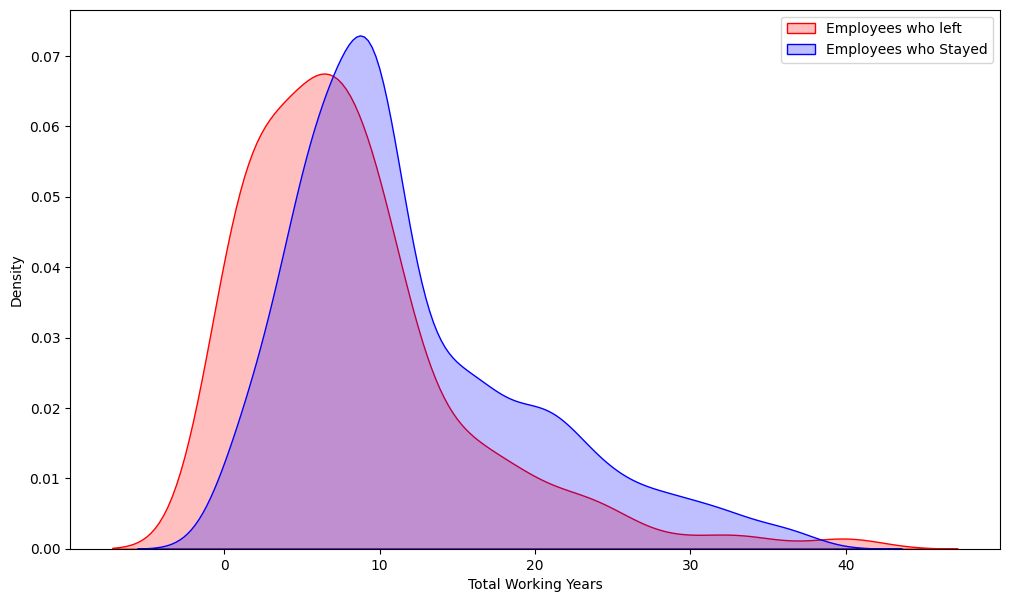

In [23]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['TotalWorkingYears'], label='Employees who left', fill=True, color='r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label='Employees who Stayed', fill=True, color='b')
plt.xlabel('Total Working Years')
plt.legend()


In [24]:
#Mann-Whitney's test to check if there is a significant difference between the two groups
from scipy.stats import mannwhitneyu
stats, p = mannwhitneyu(left_df["TotalWorkingYears"], stayed_df["TotalWorkingYears"])
print(f'p-value: {p}')
# p-value is 2.399569364798952e-14 which is less than 0.05, so we reject the null hypothesis
# There is significant difference in the total working years between employees who left and stayed

p-value: 2.399569364798952e-14


* There are no significant differences in Monthly Income between Female and Male employees (p=0.09)

<Axes: xlabel='Gender', ylabel='MonthlyIncome'>

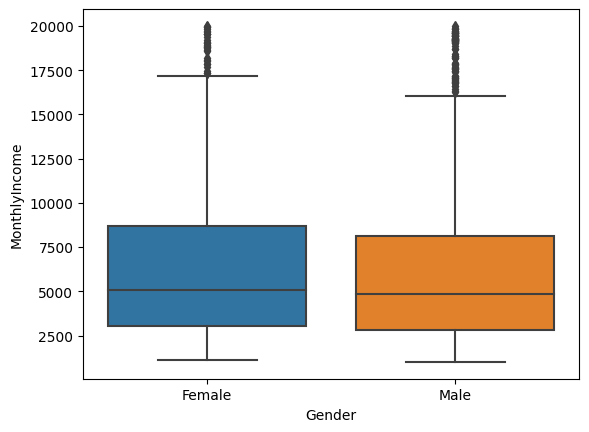

In [25]:
# Let's see the Gender vs. Monthly Income
sns.boxplot(x='Gender', y='MonthlyIncome', data=data)

In [26]:
#Mann-Whitney's test to check if there is a significant difference between Male and Female MonthlyIncome
from scipy.stats import mannwhitneyu
male_income = data[data['Gender'] == 'Male']['MonthlyIncome']
female_income = data[data['Gender'] == 'Female']['MonthlyIncome']

stats, p = mannwhitneyu(male_income, female_income)
print(f'p-value: {p}')
# p-value is 0.08841668326602112 which is greater than 0.05, so we fail to reject the null hypothesis and assume no differences in MonthlyIncome between Male and Female employees

p-value: 0.08841668326602112


* Research Directors and Managers have the highest Monthly Income
* Sales Representatives have the lowest Monthly Income, followed by Research Scientists and Lab Technicians

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

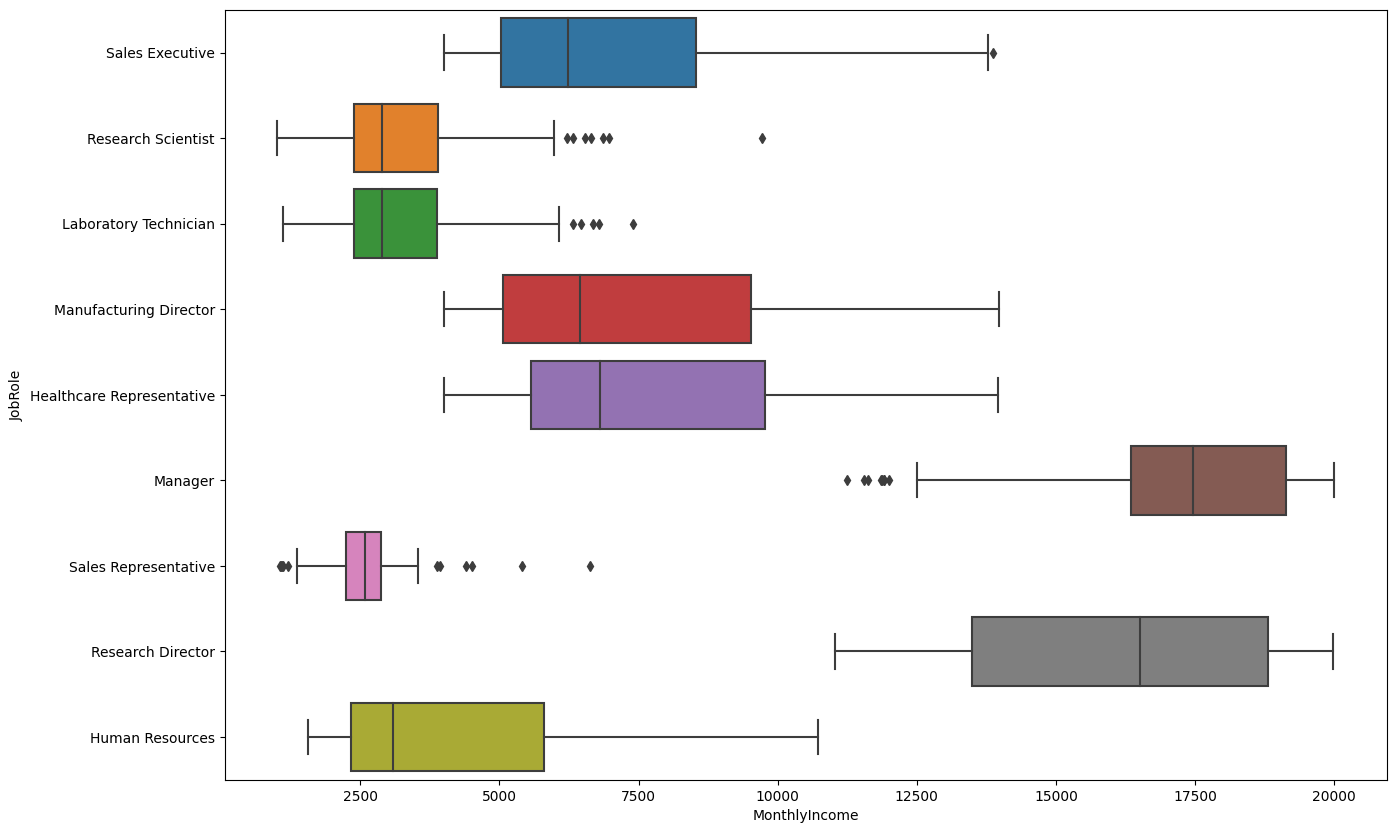

In [27]:
# Let's see the Job Role vs. Monthly Income
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=data)

## 4. **Data Preparation**

### 4.1 Categorical Variables Encoding

In [28]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
#Separating all categorical data from the dataset
X_cat = data[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat = ohe.fit_transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)
#assigning column names
X_cat.columns = ohe.get_feature_names_out(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])

In [29]:
X_cat

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [30]:
X_num = data[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 
              'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 
              'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 
              'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

X_all = pd.concat([X_num, X_cat], axis=1)

In [31]:
X_cat.shape

(1470, 26)

In [32]:
X_all

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### 4.2 Data Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_all)

### 4.3 Train and Test datasets

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['Attrition'], test_size=0.25)

### 4.4 Class Balancing

In [35]:
#perform a sampling technique to balance the dataset for data['Attrition'] ==1 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, sampling_strategy='minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [36]:
from imblearn.over_sampling import RandomOverSampler

# Perform random oversampling
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [37]:
from imblearn.combine import SMOTETomek
# Perform random sampling
smotetomek = SMOTETomek(random_state=0)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)

## 5. **Data Science**

### 5.1 Logistic Regression

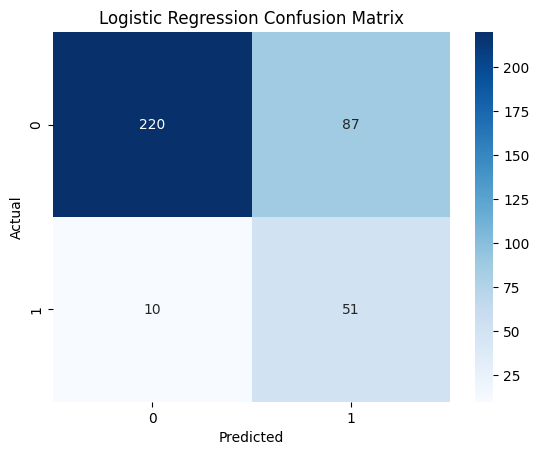

              precision    recall  f1-score   support

           0       0.96      0.72      0.82       307
           1       0.37      0.84      0.51        61

    accuracy                           0.74       368
   macro avg       0.66      0.78      0.67       368
weighted avg       0.86      0.74      0.77       368



In [54]:
from sklearn.linear_model import LogisticRegression

lreg_model = LogisticRegression()
lreg_model.fit(X_train_smote, y_train_smote)

lreg_model.score(X_test, y_test)

from sklearn.metrics import confusion_matrix, classification_report

y_pred = lreg_model.predict(X_test)
lreg_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(lreg_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))


### 5.2 Random Forest Classifier

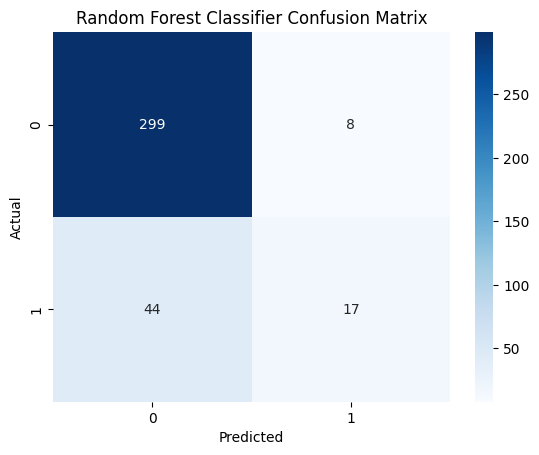

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       307
           1       0.68      0.28      0.40        61

    accuracy                           0.86       368
   macro avg       0.78      0.63      0.66       368
weighted avg       0.84      0.86      0.83       368



In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train_smote, y_train_smote)

rfc_model.score(X_test, y_test)

y_pred = rfc_model.predict(X_test)
rfc_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(rfc_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

### 5.3 XGBoost Classifier

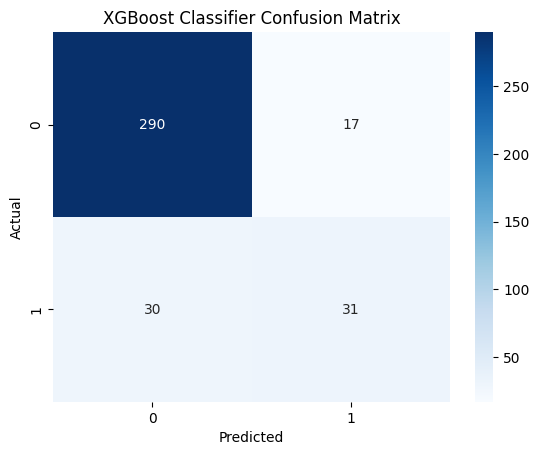

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       307
           1       0.65      0.51      0.57        61

    accuracy                           0.87       368
   macro avg       0.78      0.73      0.75       368
weighted avg       0.86      0.87      0.87       368



In [56]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_smote, y_train_smote)

xgb_model.score(X_test, y_test)

y_pred = xgb_model.predict(X_test)
xgb_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(xgb_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Classifier Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

### 5.4 CatBoost Classifier

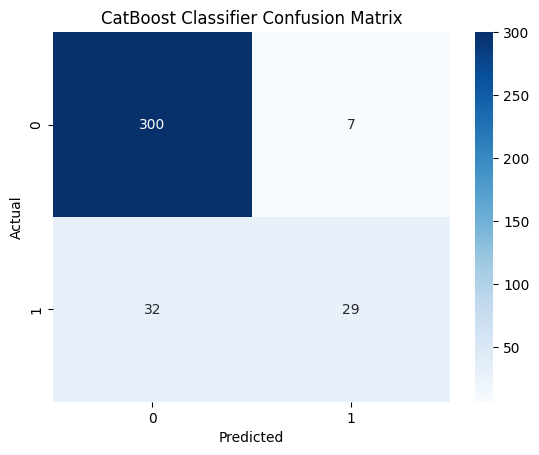

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       307
           1       0.81      0.48      0.60        61

    accuracy                           0.89       368
   macro avg       0.85      0.73      0.77       368
weighted avg       0.89      0.89      0.88       368



In [57]:
import catboost as cb

cb_model = cb.CatBoostClassifier(verbose=0)
cb_model.fit(X_train_smote, y_train_smote)

cb_model.score(X_test, y_test)

y_pred = cb_model.predict(X_test)
cb_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(cb_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Classifier Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

### 5.5 Artificial Neural Network (ANN) Classifier

In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train_smote.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_smote, y_train_smote, epochs=40, batch_size=8)

model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


Epoch 1/40


232/232 [==============================] - 1s 2ms/step - loss: 0.5783 - accuracy: 0.6928
Epoch 2/40
232/232 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.7905
Epoch 3/40
232/232 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8445
Epoch 4/40
232/232 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8769
Epoch 5/40
232/232 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.8915
Epoch 6/40
232/232 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9125
Epoch 7/40
232/232 [==============================] - 0s 2ms/step - loss: 0.1779 - accuracy: 0.9357
Epoch 8/40
232/232 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9374
Epoch 9/40
232/232 [==============================] - 0s 2ms/step - loss: 0.1245 - accuracy: 0.9611
Epoch 10/40
232/232 [==============================] - 0s 2ms/step - loss: 0.1074 - accuracy: 0.9676
Epoch 11/4

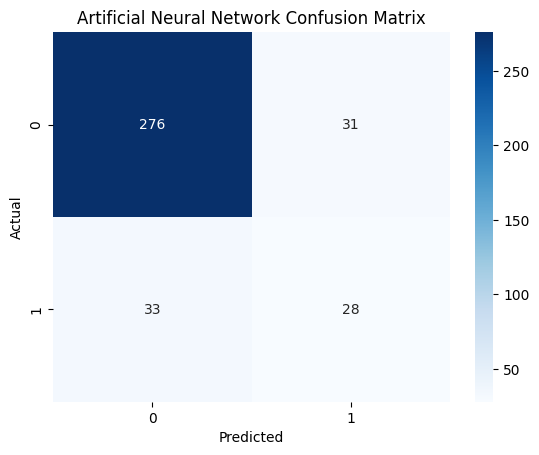

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       307
           1       0.47      0.46      0.47        61

    accuracy                           0.83       368
   macro avg       0.68      0.68      0.68       368
weighted avg       0.82      0.83      0.82       368



In [60]:
ann_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(ann_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Artificial Neural Network Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

12/12 [==============================] - 0s 1ms/step


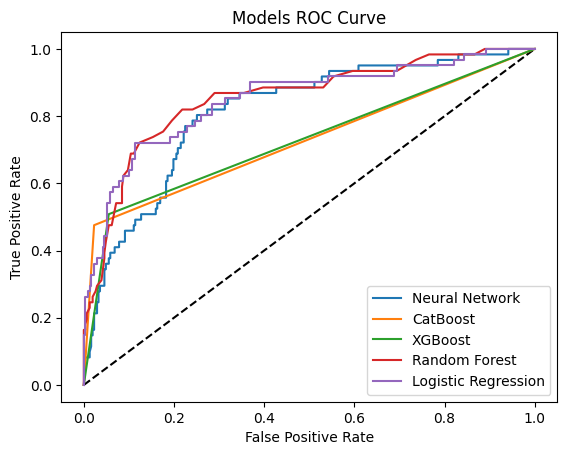

In [61]:
from sklearn.metrics import roc_curve
#for each model, plot ROC curve in the same figure. Each line different color for each model
y_pred_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Models ROC Curve')

y_pred_prob = cb_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='CatBoost')

y_pred_prob = xgb_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='XGBoost')

y_pred_prob = rfc_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Random Forest')

y_pred_prob = lreg_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression')

plt.legend()
plt.show()


**Conclusion**:

Random Forest Classifier (RFC) and Logistic Regression (LR) showed the best ROC curve of all models. However, LR showed a much better recall for the minority class (0.84). Even with the SMOTE balancing, models showed a low True Positive Rate for the minority class. This is most likely due to imbalanced clases and lack of data to train the model, but because it depends on the number of company's employees, we will have to stick with LR model as it showed the best results of all. On the other hand, in this case we give more importance to the correct prediction of employee atrittion and we do not care much about false positives (employees predicted as leaving the company but actually stay).